In [4]:
# Loading libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Loading dataset

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Census%20Income/Census%20Income.csv')

In [7]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [8]:
df.shape

(32560, 15)

In [9]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [11]:
# Since the dataset is large, we can check for Integrity of dataset

In [10]:
df.duplicated().sum()

24

In [35]:
df.isin([' ?']).sum().any()

True

In [36]:
df.isin([' ?']).sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     582
Income               0
dtype: int64

In [37]:
# let's Replace all the ' ?' values with NaN values

In [38]:
df = df.replace(' ?',np.nan)

In [12]:
# There are 24 Duplicated values in our datasets 

In [15]:
# Lets check if there is any whitespaces, 'NA', '-' exist in datasets

In [16]:
df.isin([' ','NA','-']).sum().any()

False

In [17]:
# No whitespaces or 'NA' or '-' exist in our dataset

In [18]:
# let's drop duplicated valiues from our datasets 

In [19]:
df.drop_duplicates(keep = 'last' ,inplace = True)

In [20]:
df.shape

(32536, 15)

In [21]:
# Missing value check 

In [31]:
Numerical = ['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']
Category = ['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']

In [40]:
# Missing Value Imputation

In [41]:
# Occupation, Workclass and Native_country are categorical variables so we can impute them with mode of that feature  

In [42]:
df['Occupation'].fillna(df['Occupation'].mode()[0],inplace = True)
df['Workclass'].fillna(df['Workclass'].mode()[0],inplace = True)
df['Native_country'].fillna(df['Native_country'].mode()[0],inplace = True)

In [43]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [44]:
# Now there are no missing values in our datasets

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32536 non-null  int64 
 1   Workclass       32536 non-null  object
 2   Fnlwgt          32536 non-null  int64 
 3   Education       32536 non-null  object
 4   Education_num   32536 non-null  int64 
 5   Marital_status  32536 non-null  object
 6   Occupation      32536 non-null  object
 7   Relationship    32536 non-null  object
 8   Race            32536 non-null  object
 9   Sex             32536 non-null  object
 10  Capital_gain    32536 non-null  int64 
 11  Capital_loss    32536 non-null  int64 
 12  Hours_per_week  32536 non-null  int64 
 13  Native_country  32536 non-null  object
 14  Income          32536 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [46]:
# There are no missing values in a datasets 

In [47]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32536.0,38.585536,13.638193,17.0,28.0,37.0,48.00,90.0
Fnlwgt,32536.0,189784.298992,105556.258211,12285.0,117831.5,178356.0,236993.25,1484705.0
Education_num,32536.0,10.081725,2.571622,1.0,9.0,10.0,12.00,16.0
Capital_gain,32536.0,1078.410069,7388.068465,0.0,0.0,0.0,0.00,99999.0
Capital_loss,32536.0,87.370912,403.107737,0.0,0.0,0.0,0.00,4356.0
Hours_per_week,32536.0,40.440343,12.347079,1.0,40.0,40.0,45.00,99.0


In [48]:
# Minimum and Maximum age is 17 and 90

In [49]:
# Minimum and maximum Education number spent is 1 and 16

In [50]:
# Minimum and  Average capital gain is 0 and Maximum capital gain is 99999 which seems to be odd  i.e. some errors in our datasets 

In [51]:
# No of hours spent per week is between 1 and 99 and average hours spent per week is 40

In [52]:
for i in Category:
    print(i)
    print(df[i].value_counts())
    print('='*100)

Workclass
Workclass
Private             24509
Self-emp-not-inc     2540
Local-gov            2093
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
Education
Education
HS-grad         10494
Some-college     7282
Bachelors        5352
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: count, dtype: int64
Marital_status
Marital_status
Married-civ-spouse       14970
Never-married            10666
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64
Occupation
Occupation
Prof-specialty       5979
Craft-repair         4094
E

In [53]:
# Starting our EDA by analyzing our target variable first

In [57]:
# Univariate Analysis of Numerical Columns 

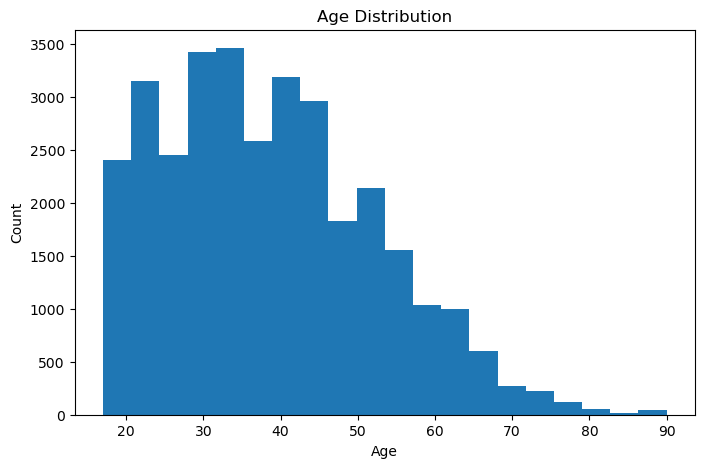

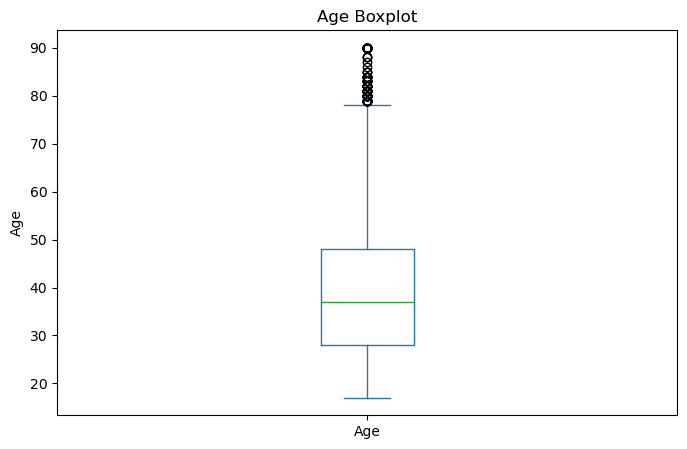

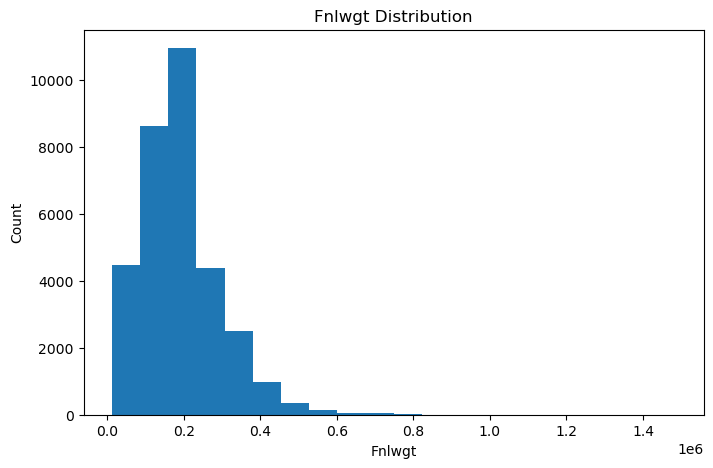

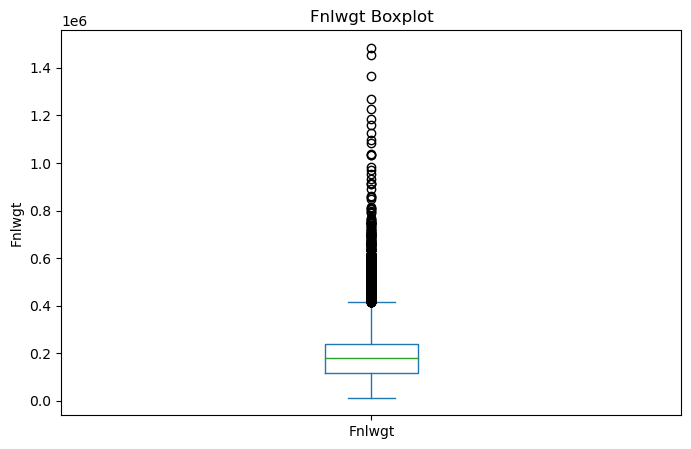

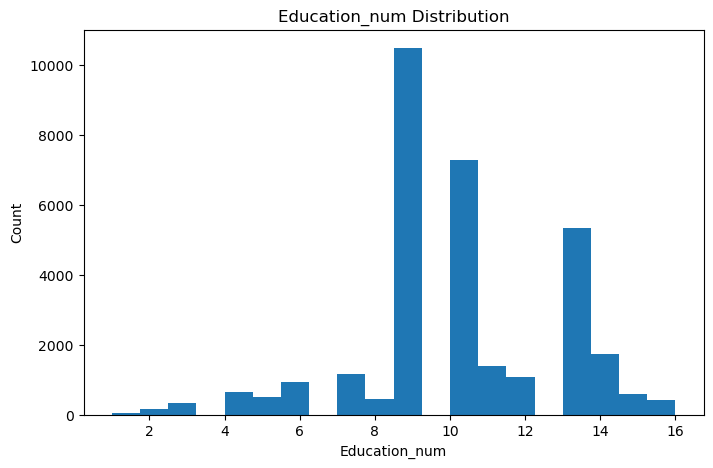

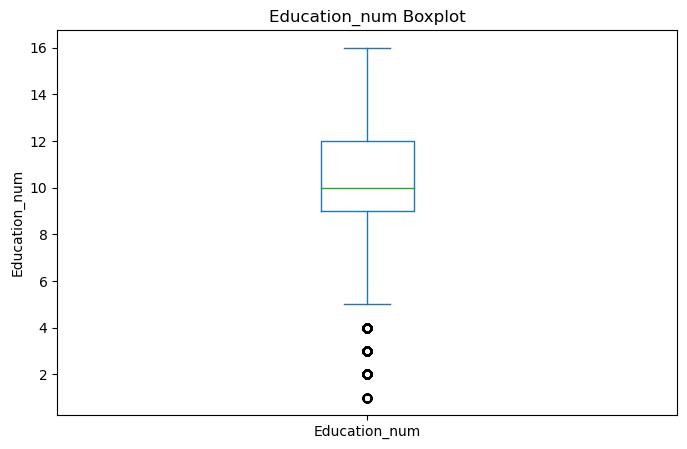

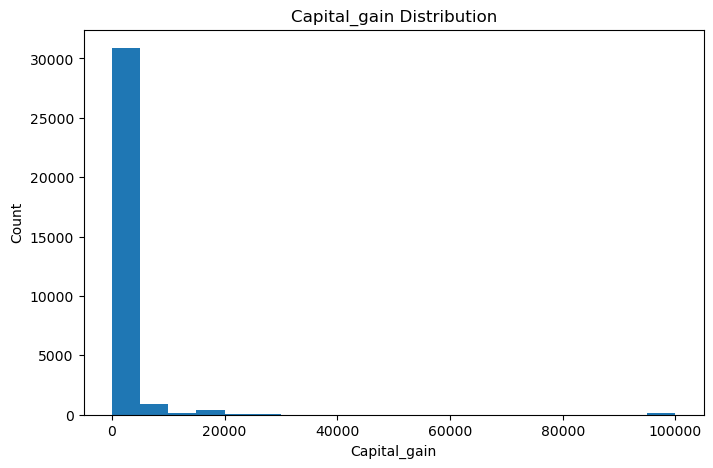

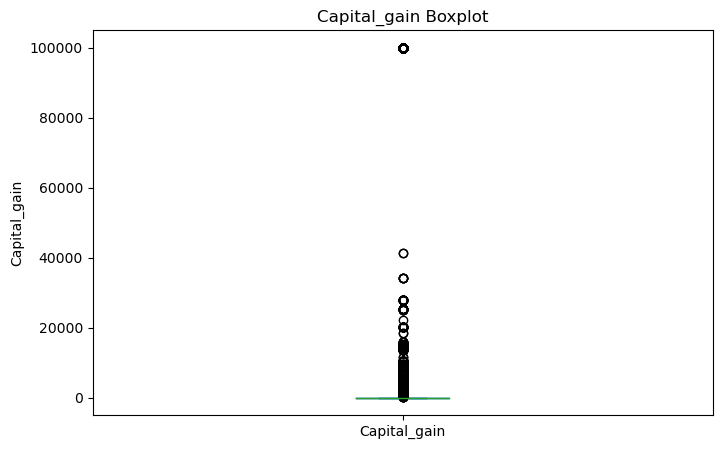

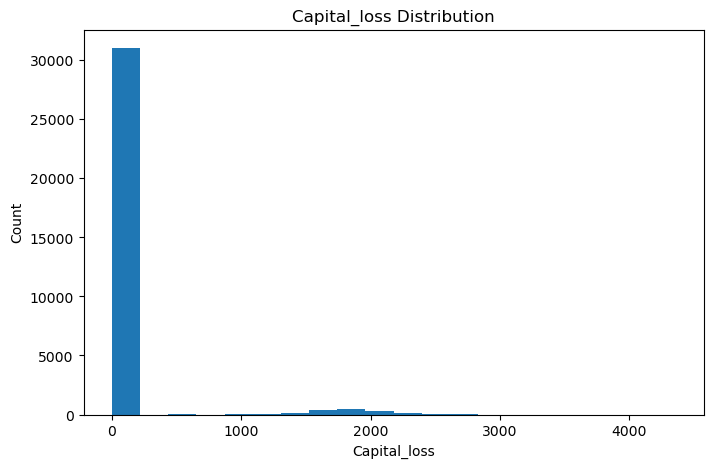

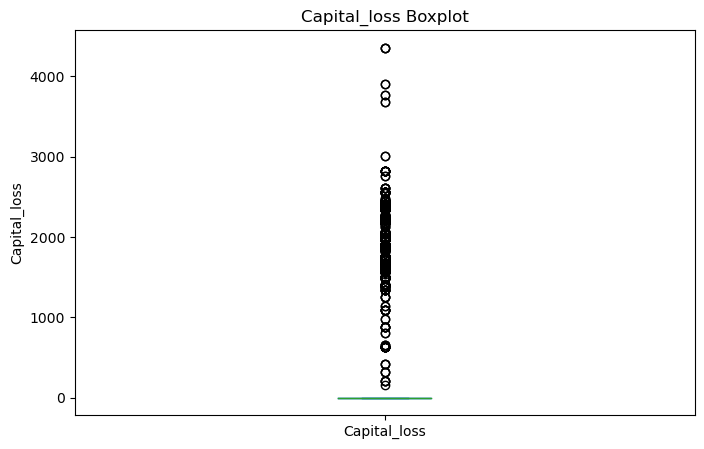

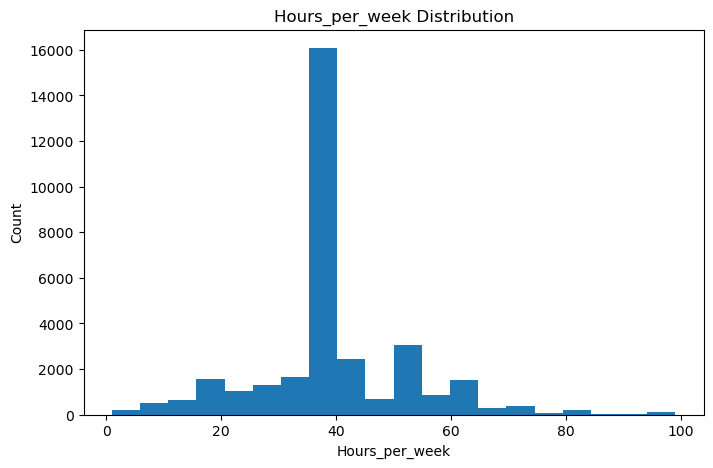

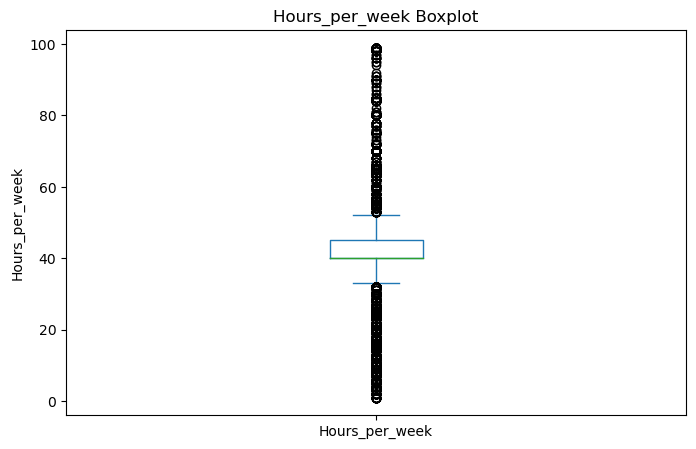

In [59]:
for col in Numerical:
    plt.figure(figsize=(8,5))
    plt.title(f'{col} Distribution')
    df[col].plot(kind = 'hist',bins = 20)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()
    
    plt.figure(figsize=(8,5))
    plt.title(f'{col} Boxplot')
    df[col].plot(kind = 'box')
    plt.ylabel(col)
    plt.show()

In [60]:
# Univariate analysis of categorical columns 

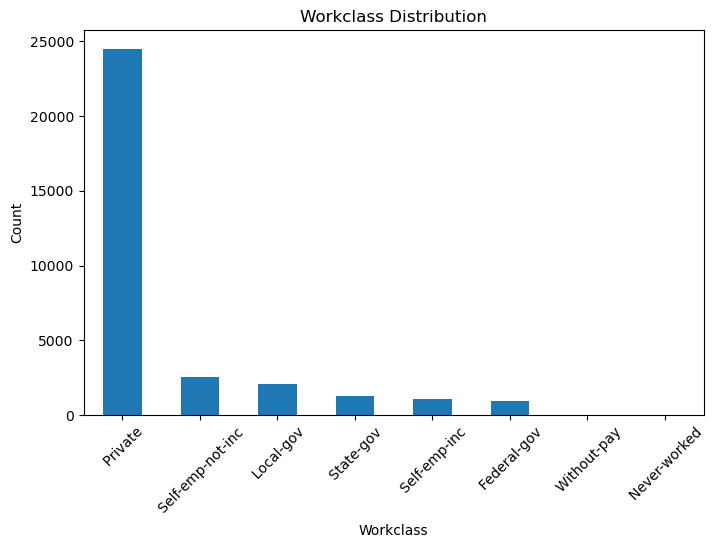

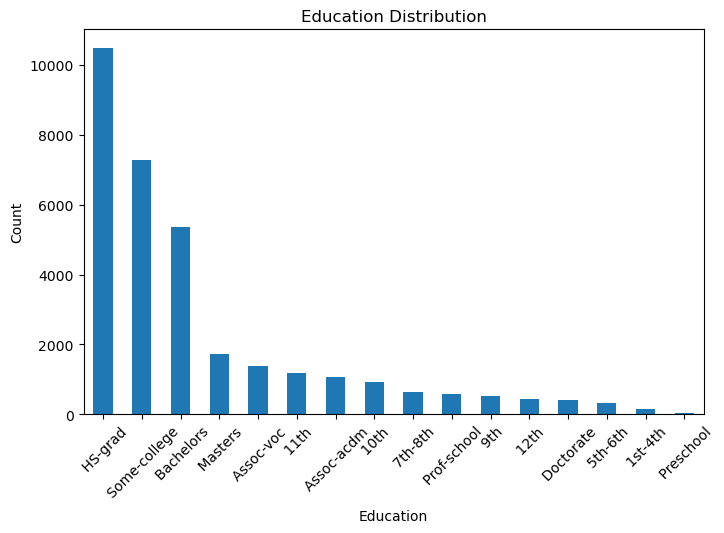

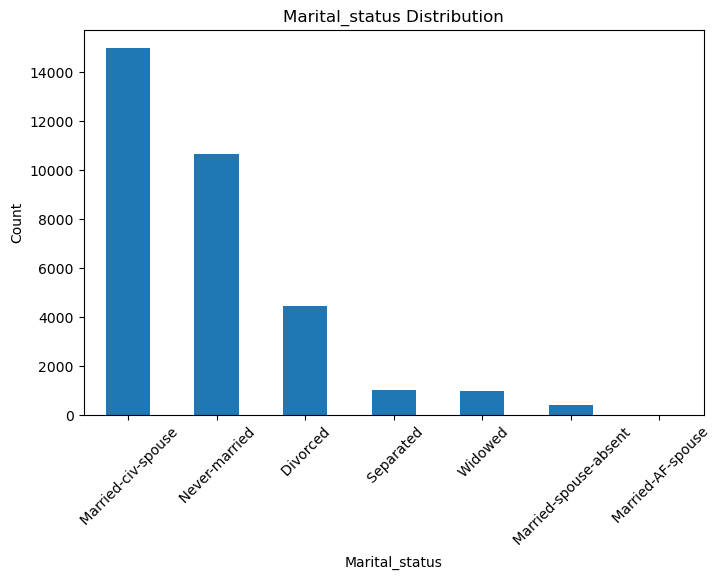

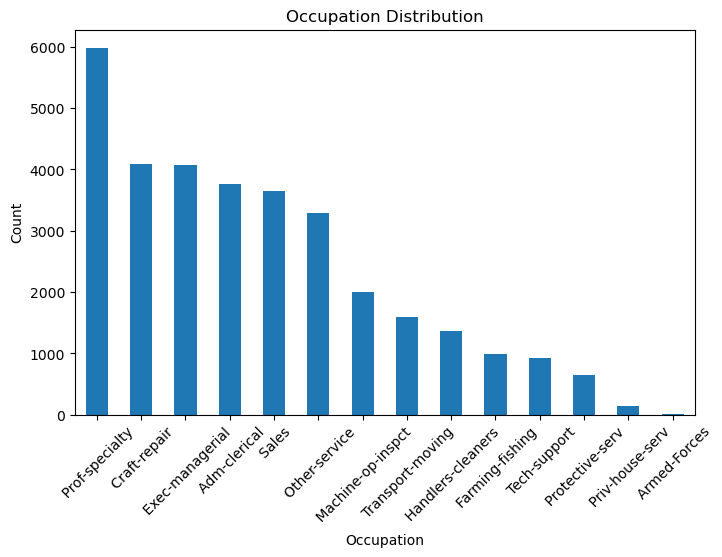

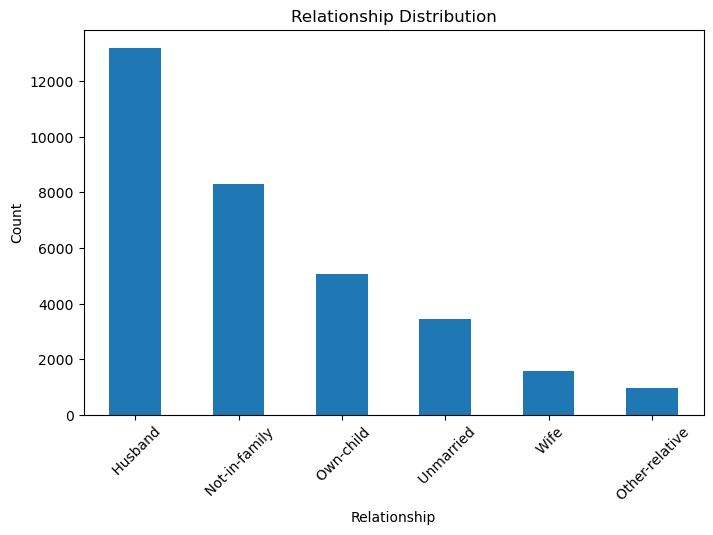

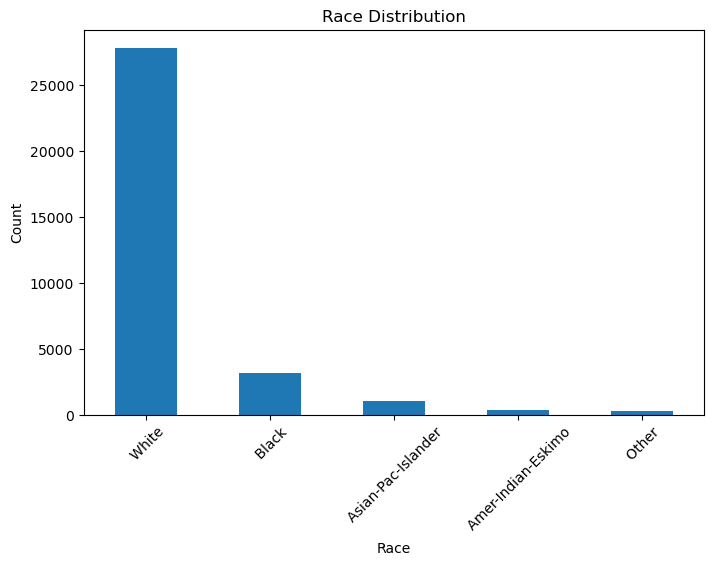

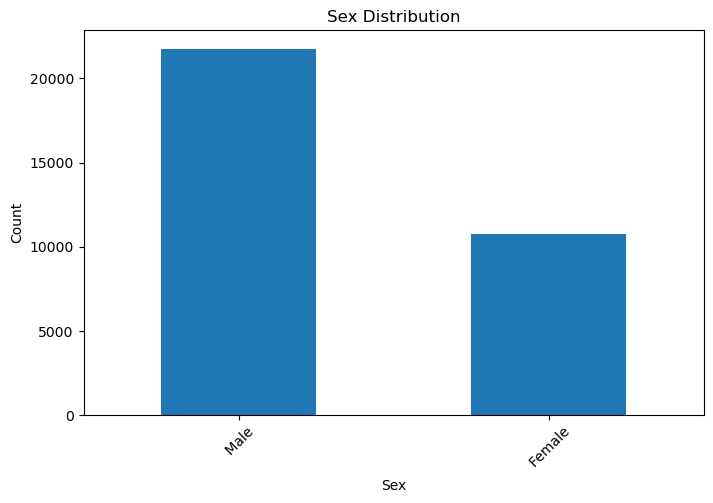

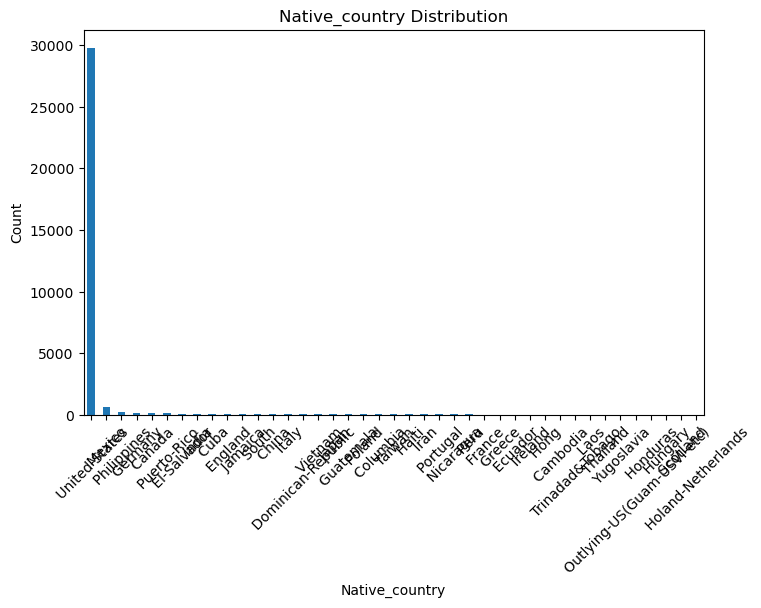

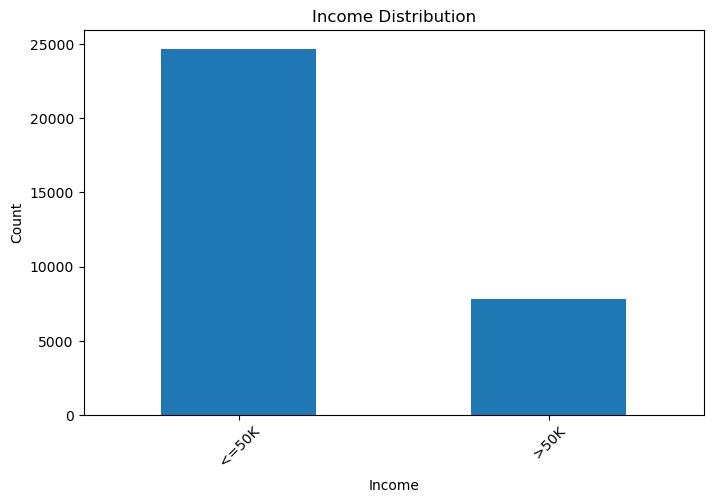

In [61]:
for col in Category:
    plt.figure(figsize=(8,5))
    plt.title(f'{col} Distribution')
    df[col].value_counts().plot(kind = 'bar')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation = 45)
    plt.show()

In [65]:
# EDA of target variable first

In [64]:
df['Income'].value_counts()

Income
<=50K    24697
>50K      7839
Name: count, dtype: int64

In [63]:
# In our target variable we have 24697 people who earn less than 50k and 7839 people who earn more than 50k
# We can see that our target variable is imbalanced

In [66]:
# Exploration of 'AGE' column

In [67]:
print('Minimum Years:', df['Age'].min(), 'years')
print('Maximum Years:', df['Age'].max(), 'years')
print('Average Years:', round(df['Age'].mean(),2), 'years')

Minimum Years: 17 years
Maximum Years: 90 years
Average Years: 38.59 years


In [68]:
df['Age'].value_counts()

Age
36    898
31    888
34    886
23    876
33    875
     ... 
83      6
88      3
85      3
86      1
87      1
Name: count, Length: 73, dtype: int64

In [69]:
# Age group of '36' year has the highest count of value '898' and there are outliers present

In [70]:
# WORKCLASS COLUMN

In [71]:
df['Workclass'].value_counts()

Workclass
Private             24509
Self-emp-not-inc     2540
Local-gov            2093
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [72]:
# Workclass column has the highest count of value '24509' which belongs to category 'Private'

In [73]:
# There are more numbers of 'Private' class workgroup than others

In [74]:
# Education Column

In [76]:
df['Education'].value_counts()

Education
HS-grad         10494
Some-college     7282
Bachelors        5352
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: count, dtype: int64

In [77]:
# There are high number of HS-grad qualification Education count

In [79]:
df['Marital_status'].value_counts()

Marital_status
Married-civ-spouse       14970
Never-married            10666
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64

In [80]:
#There are highest no of Married-civ-spouse marital status out there in dataset

In [81]:
df['Sex'].value_counts()

Sex
Male      21774
Female    10762
Name: count, dtype: int64

In [82]:
# No of male count is higher than female of value '21774'

In [84]:
# Bivariate Analysis for Numerical Columns

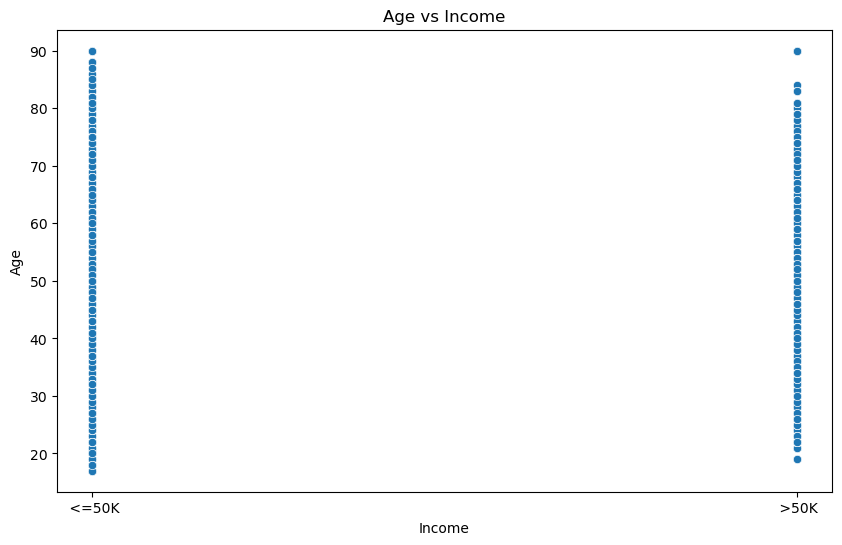

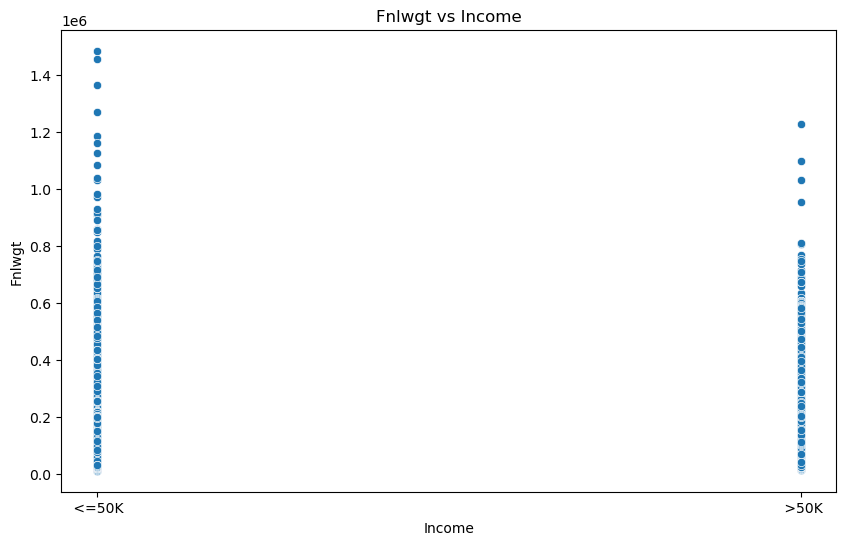

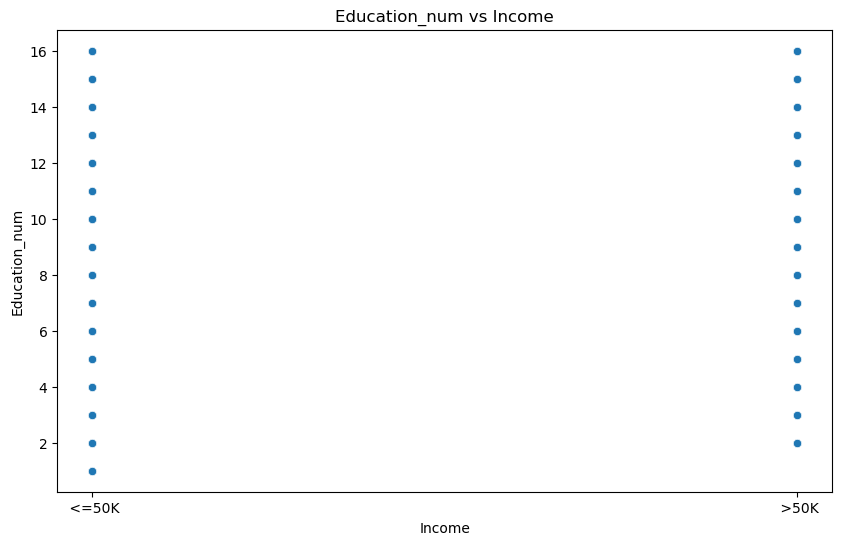

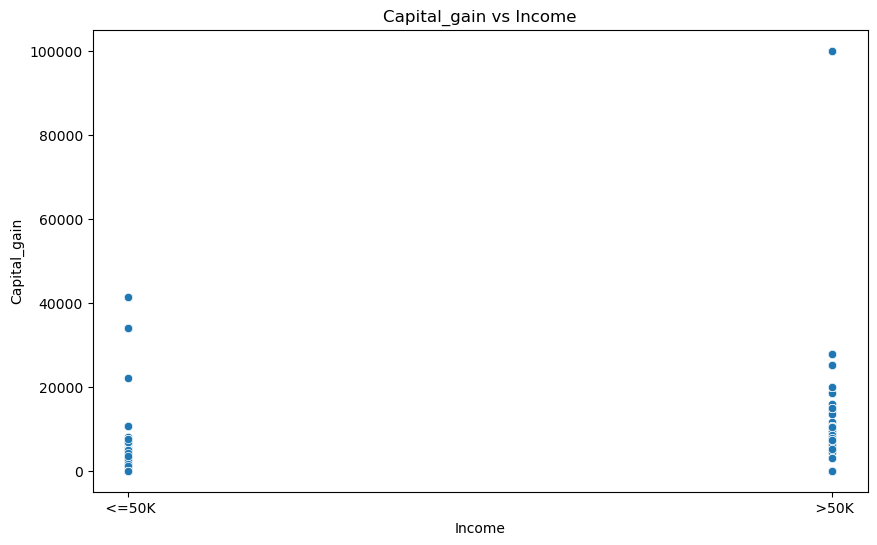

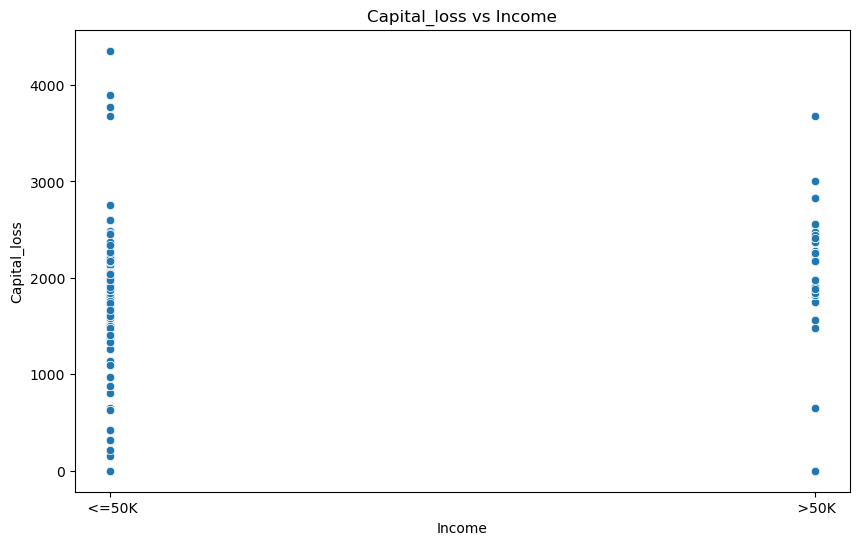

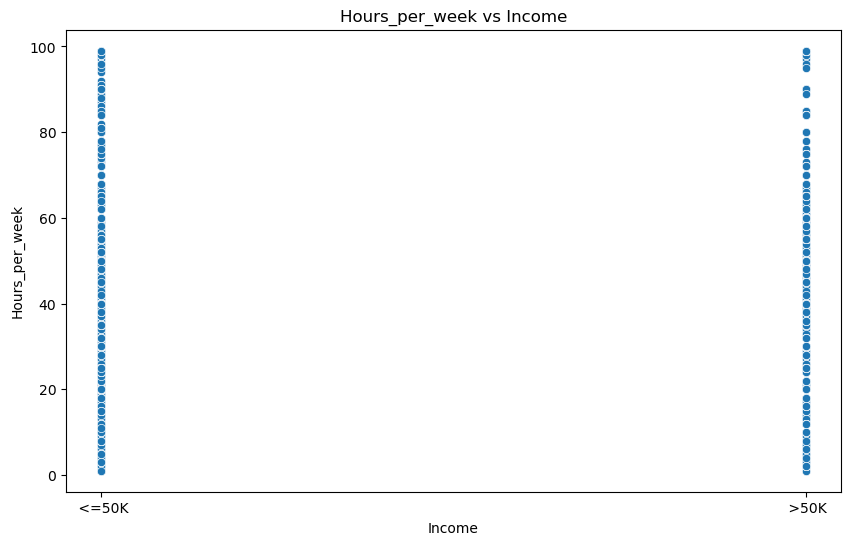

In [93]:
for col in Numerical:
    plt.figure(figsize=(10,6))
    sns.scatterplot(x='Income', y = col, data = df)
    plt.title(f'{col} vs Income')
    plt.xlabel('Income')
    plt.ylabel(col)
    plt.show()

In [88]:
# Bivariate analysis for Categorical Columns

In [123]:
Category = ['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country']

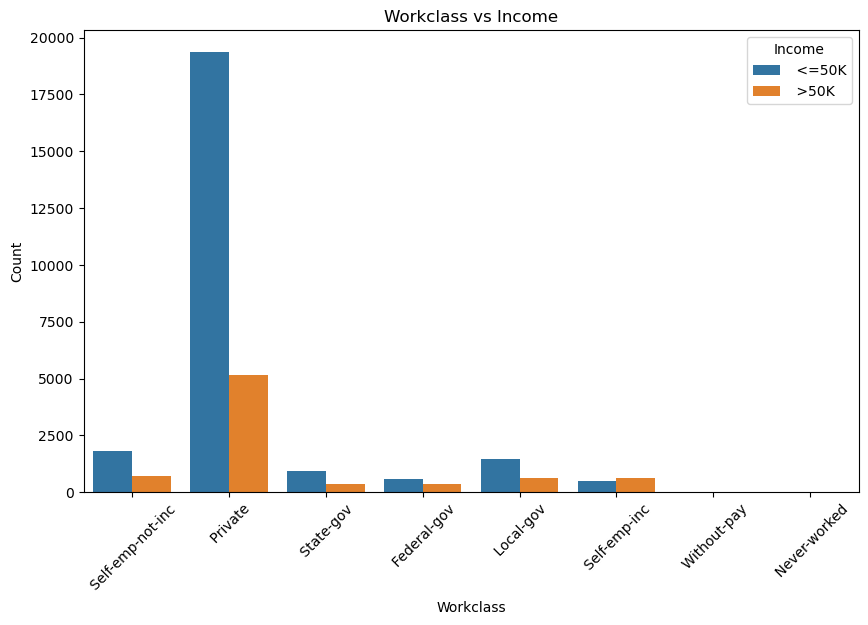

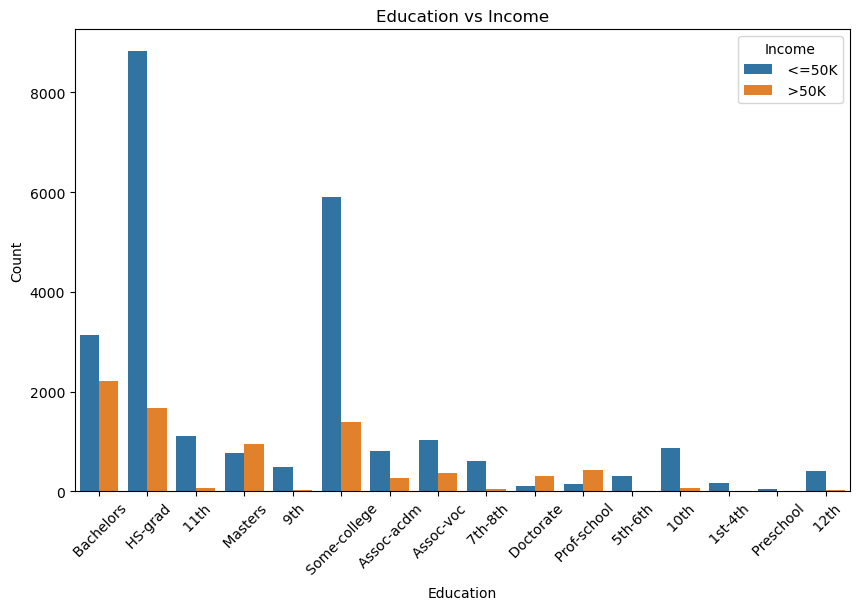

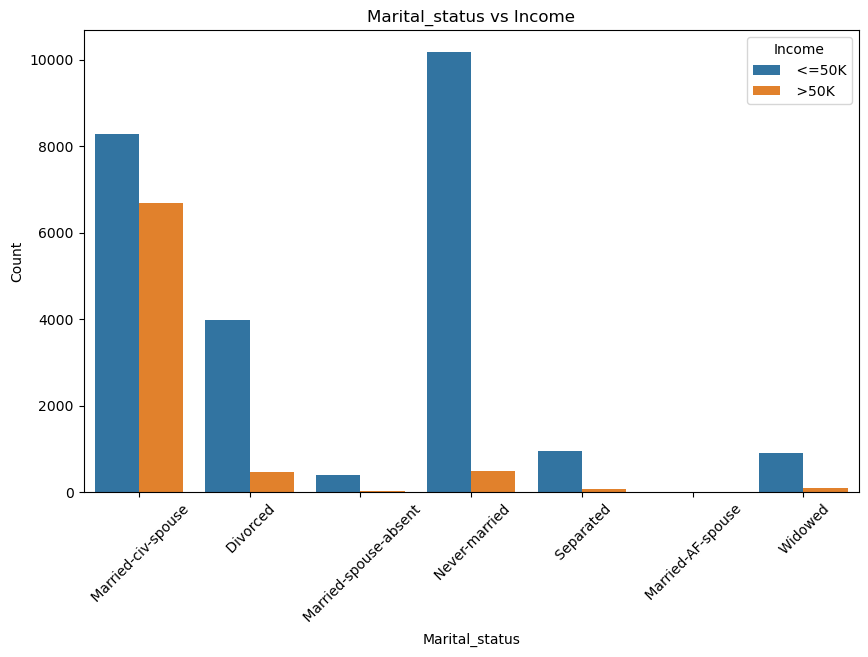

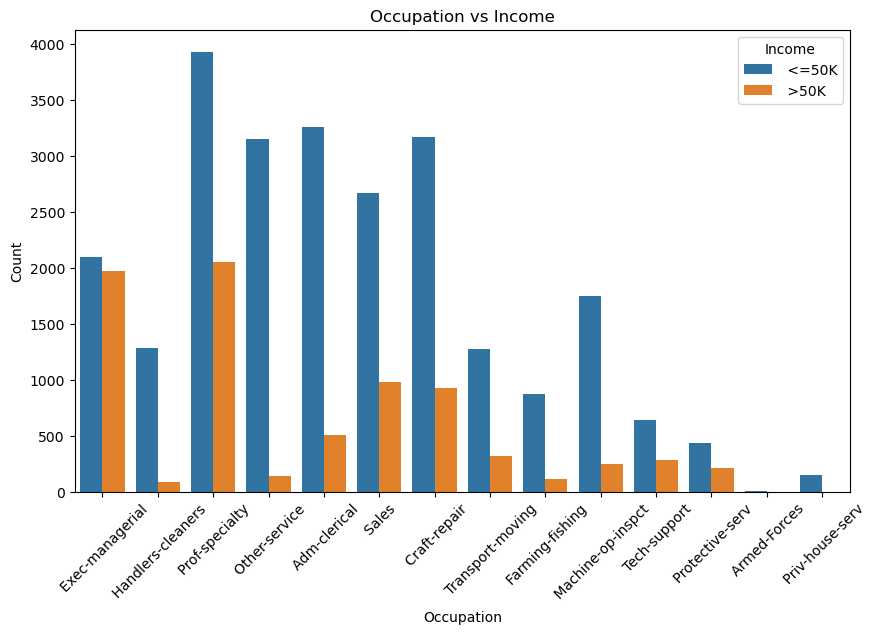

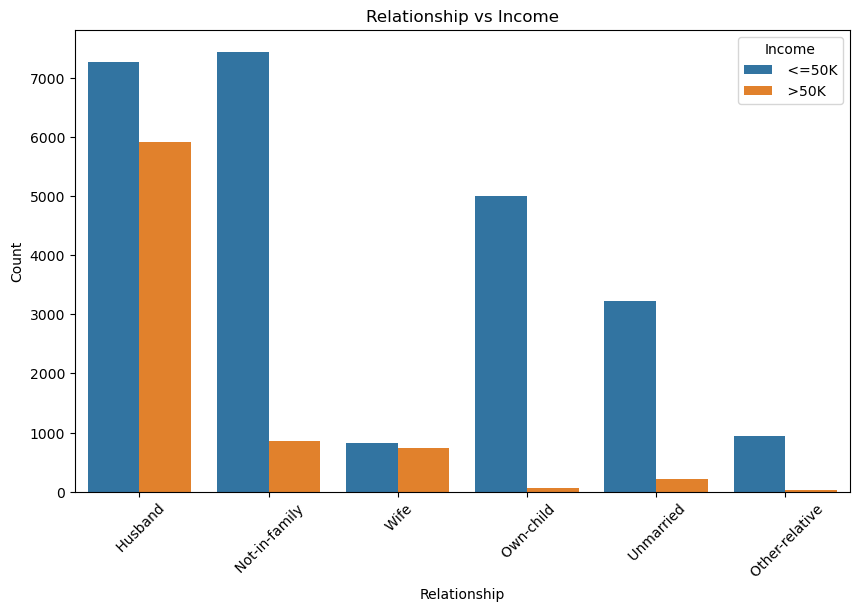

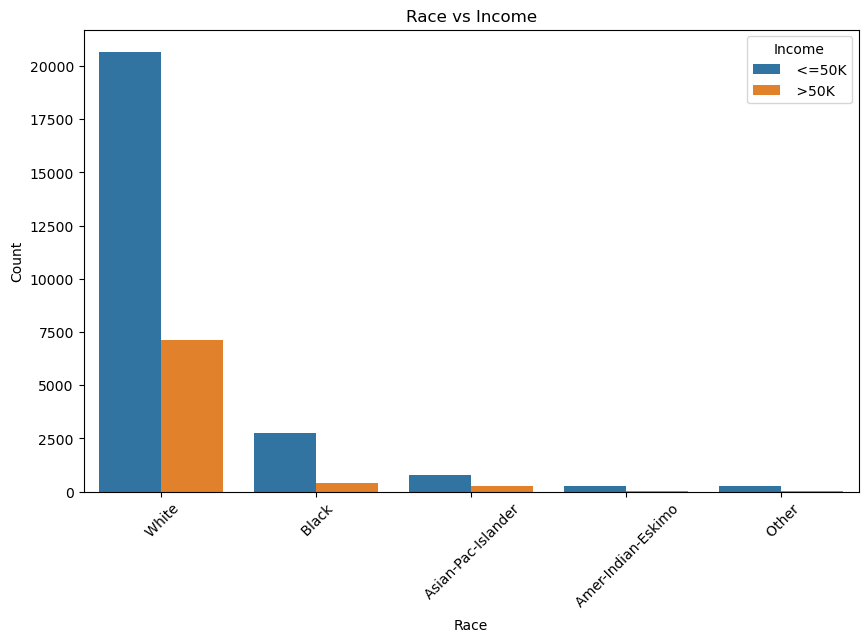

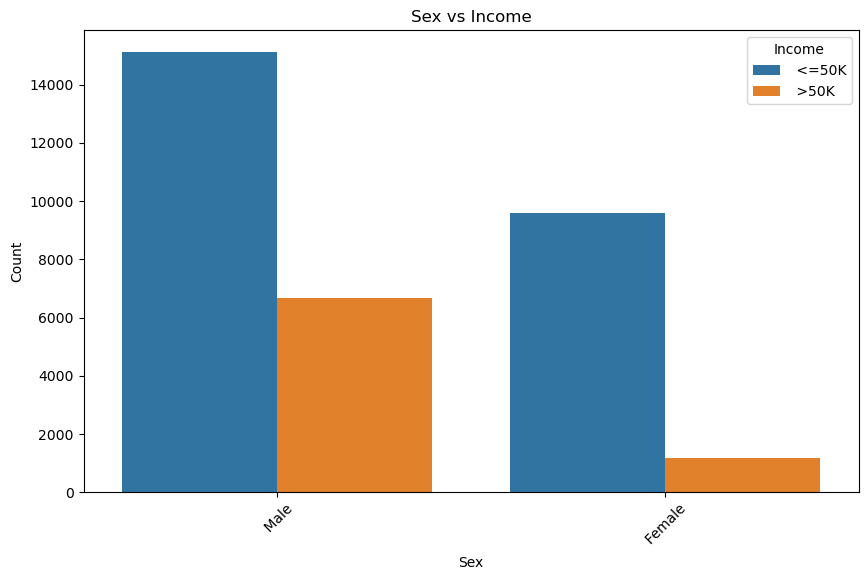

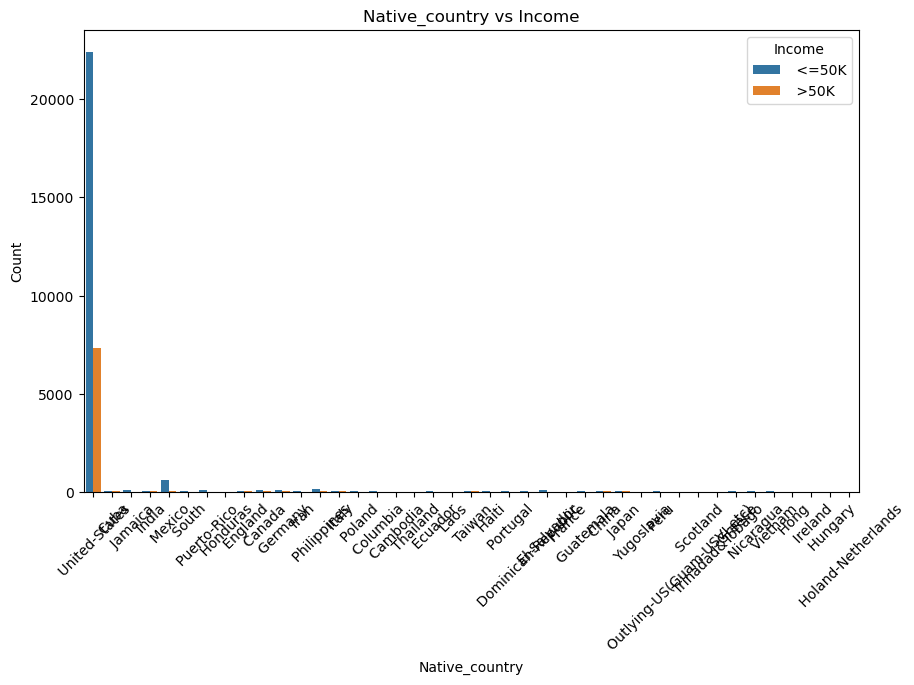

In [91]:
for col in Category:
    plt.figure(figsize=(10,6))
    sns.countplot(x= col,hue = 'Income', data = df)
    plt.title(f'{col} vs Income')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation = 45)
    plt.legend(title = 'Income', loc = 'upper right')
    plt.show()

In [99]:
# WORKCLASS COLUMN

In [94]:
# Interesting observation comes with Self-emp-inc category where the number of people who earn more than 50k is higher than number of people who earn less than 50k

In [95]:
# There is significant difference between people who earn less than 50k and people who earn more than 50k

In [97]:
# We can see very minute difference  in federal-gov category between people who earn less than 50k and people who earn more than 50k 
# Same goes for state-gov category

In [98]:
# Certainly private category has higher wages compared to others

In [101]:
# EDUCATION COLUMN 

In [102]:
# HS-grad category is the most prevalent education

In [103]:
# There are very few people who earn more than 50k belongs to below 12 pass education level 

In [104]:
# Maximum number of people who earn more than 50k belongs to Bachelors education

In [105]:
# Interesting observation comes with income of high education level where number of people who earn more than 50k is higher than number of people who earn less than 50k

In [106]:
# MARITAL_STATUS COLUM

In [108]:
# Married are most likely to earn more than 50k dollar a year

In [109]:
# One thing to note here is that Married-civ-spouse is the only category which has comparable number for people belonging to both categories

In [112]:
# OCCUPATION COLUMN

In [110]:
# Exec-managerial category are equally likely to earn more than 50k

In [111]:
# Prof-speciality category are morelikely to earn more than 50k

In [113]:
# RELATIONSHIP COLUMN

In [114]:
# Wives are equally likely to earn more than 50k dollar a year

In [115]:
# Husbands, although significant , there is less possibilty for them to earn more than 50k dollars a year

In [116]:
# There are just handful of people who earn more than 50k dollars a year

In [117]:
# RACE COLUMN

In [118]:
# Maximium number of people who earn more than 50k is from White race
# But this data is limited so not a reliable one!

In [119]:
# SEX COLUMN

In [120]:
# In case of male there are more number of people who earn more than 50k compared to female

In [121]:
# Encoding Categorical Data

In [124]:
Category = ['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']

In [125]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0


In [126]:
# Outliers detection and Removal  

In [127]:
Numerical = ['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']

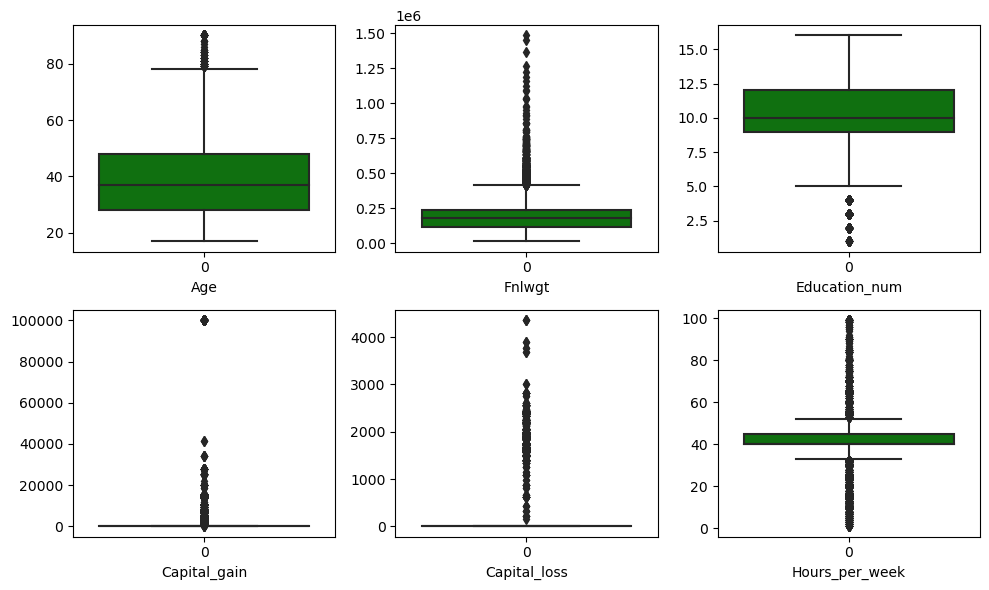

In [128]:
plt.figure(figsize=(10,6))
plot_number = 1
for column in Numerical:
    if plot_number <= 6:
        plt.subplot(2,3,plot_number)
        sns.boxplot(df[column], color = 'green')
        plt.xlabel(column)
    plot_number += 1
plt.tight_layout()
plt.show()   

In [129]:
# From the above boxplot we can see that there are  outliers present in our dataset

In [130]:
# Outliers Removal using Z-score

In [132]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df_1 = df[(z<3).all(axis = 1)]

In [133]:
# Before removing outliers

In [134]:
df.shape

(32536, 15)

In [135]:
# After removing outliers

In [136]:
df_1.shape

(27751, 15)

In [139]:
df = df_1.copy()

In [140]:
# Skewness of Features

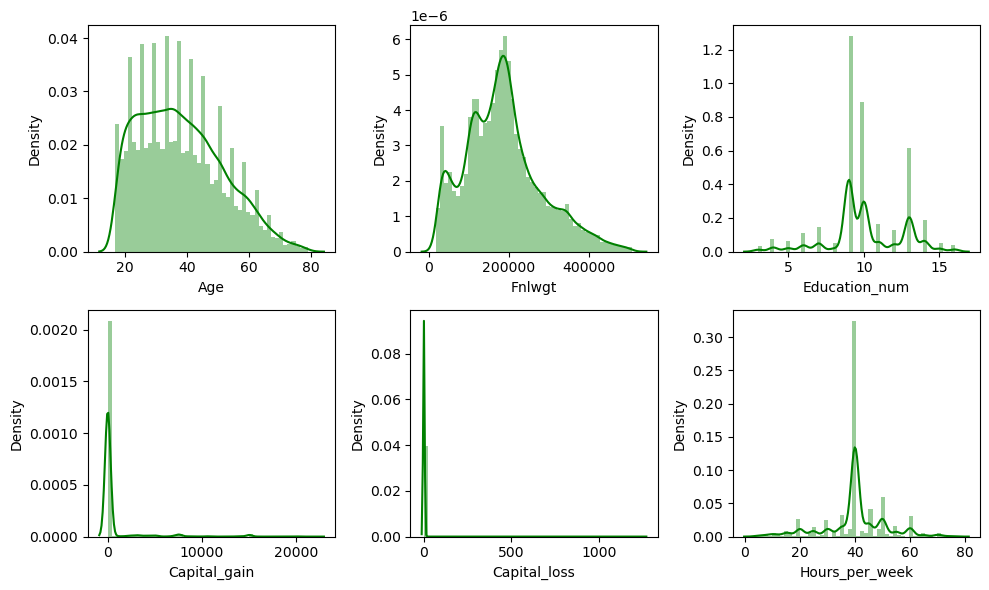

In [141]:
plt.figure(figsize=(10,6))
plotnumber = 1
for column in Numerical:
    if plotnumber <= 6:
        plt.subplot(2,3,plotnumber)
        sns.distplot(df[column], color = 'green')
        plt.xlabel(column)
    plotnumber += 1
plt.tight_layout()
plt.show()

In [142]:
df.skew()

Age                0.484822
Workclass          0.081802
Fnlwgt             0.629037
Education         -0.955723
Education_num     -0.145695
Marital_status    -0.045059
Occupation         0.013496
Relationship       0.753378
Race              -2.587054
Sex               -0.688876
Capital_gain       4.928795
Capital_loss      29.504415
Hours_per_week    -0.358726
Native_country    -5.411057
Income             1.322128
dtype: float64

In [143]:
# Relationship, Sex, Native_country, Income are skewed but as they are categorical concept of skewness is not an issue

In [144]:
# Capital_gain and Capital_loss are numeric variable with lots of zero values and high numbers .So skewness exist between them.
# Because there is no point Transforming it because at the end data will be skewed

In [145]:
# So we will have option of scaling data to handle skewness in Capital_gain and Capital_loss

In [146]:
df.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.030416,-0.077342,-0.003984,0.044602,-0.286029,-0.001196,-0.270566,0.020581,0.089817,0.132521,0.023470,0.090644,0.035621,0.241574
Workclass,0.030416,1.000000,-0.026825,0.001559,-0.001812,-0.016039,0.008068,-0.057876,0.066438,0.069649,0.011463,-0.010714,0.028328,0.002607,-0.007850
Fnlwgt,-0.077342,-0.026825,1.000000,-0.021254,-0.040000,0.029528,-0.002084,0.015059,-0.102369,0.023150,-0.003736,0.003214,-0.018497,-0.105660,-0.011713
Education,-0.003984,0.001559,-0.021254,1.000000,0.346921,-0.037165,-0.042268,-0.009515,0.026706,-0.031634,0.026657,-0.000323,0.059634,0.091185,0.071005
Education_num,0.044602,-0.001812,-0.040000,0.346921,1.000000,-0.058419,0.072769,-0.092841,0.082854,0.003962,0.157647,0.007343,0.156044,0.147551,0.319622
Marital_status,-0.286029,-0.016039,0.029528,-0.037165,-0.058419,1.000000,0.036733,0.183957,-0.084552,-0.126222,-0.069563,-0.016472,-0.196855,-0.032029,-0.193939
Occupation,-0.001196,0.008068,-0.002084,-0.042268,0.072769,0.036733,1.000000,-0.038658,0.001550,0.050484,0.009435,-0.004829,-0.022046,0.018782,0.030327
Relationship,-0.270566,-0.057876,0.015059,-0.009515,-0.092841,0.183957,-0.038658,1.000000,-0.146544,-0.576987,-0.090042,0.030292,-0.262870,-0.012233,-0.247737
Race,0.020581,0.066438,-0.102369,0.026706,0.082854,-0.084552,0.001550,-0.146544,1.000000,0.125261,0.031085,-0.000082,0.057207,0.021478,0.094979
Sex,0.089817,0.069649,0.023150,-0.031634,0.003962,-0.126222,0.050484,-0.576987,0.125261,1.000000,0.069899,-0.027452,0.236827,-0.009278,0.211544


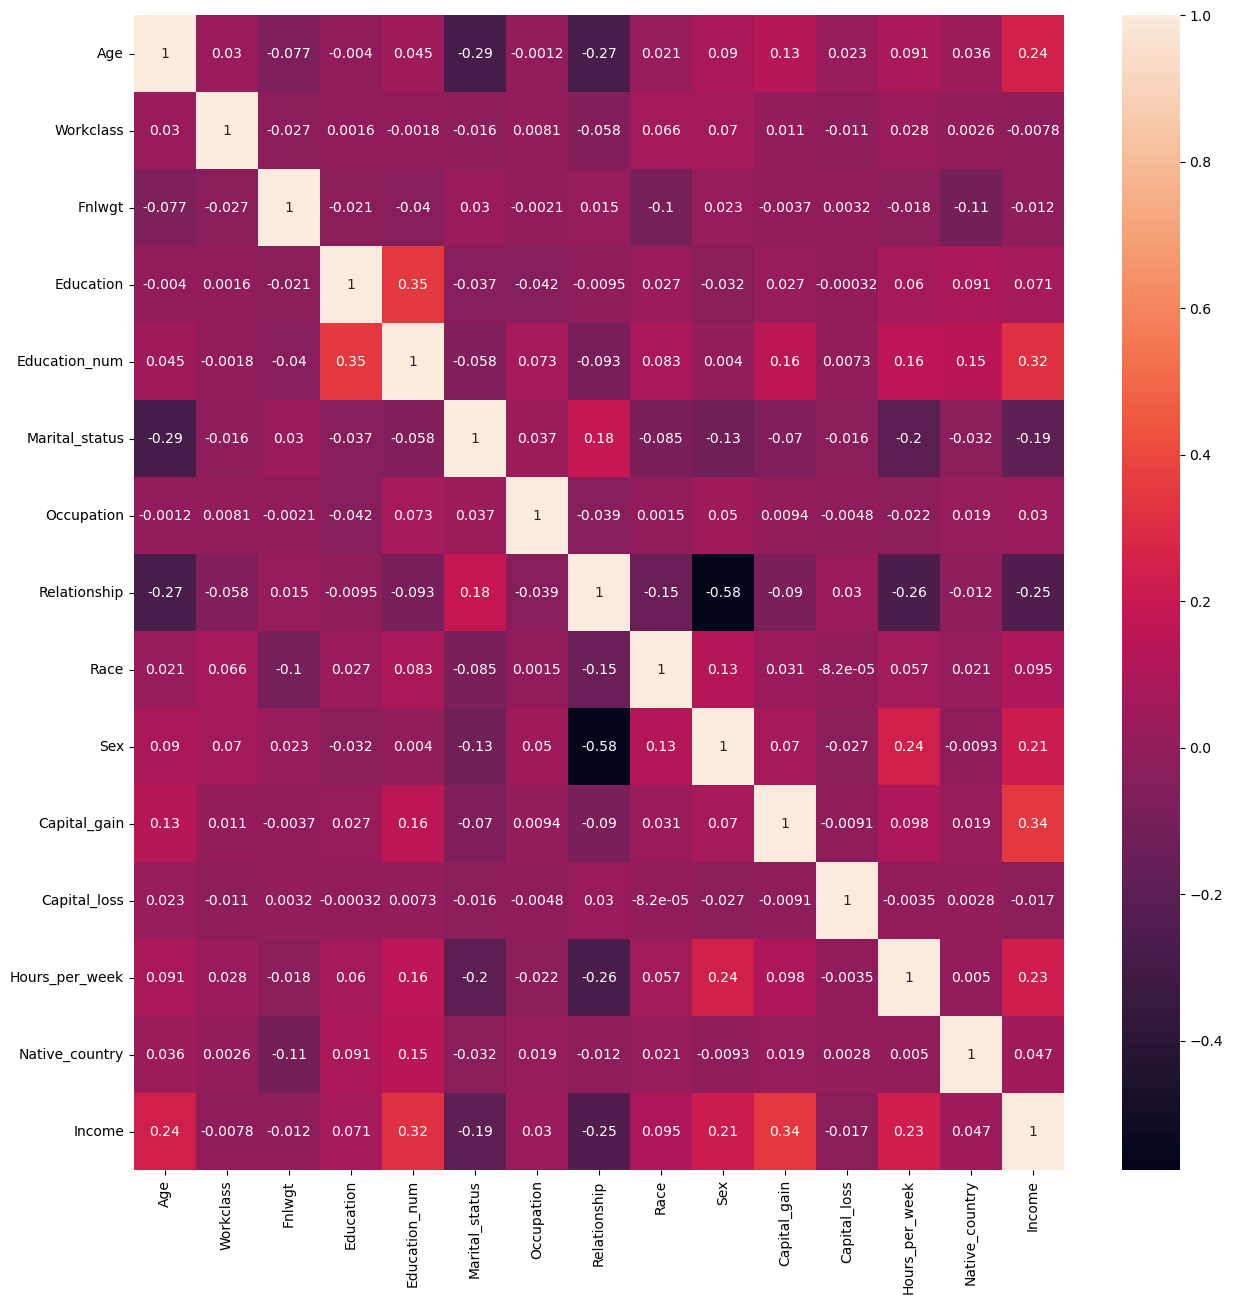

In [148]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

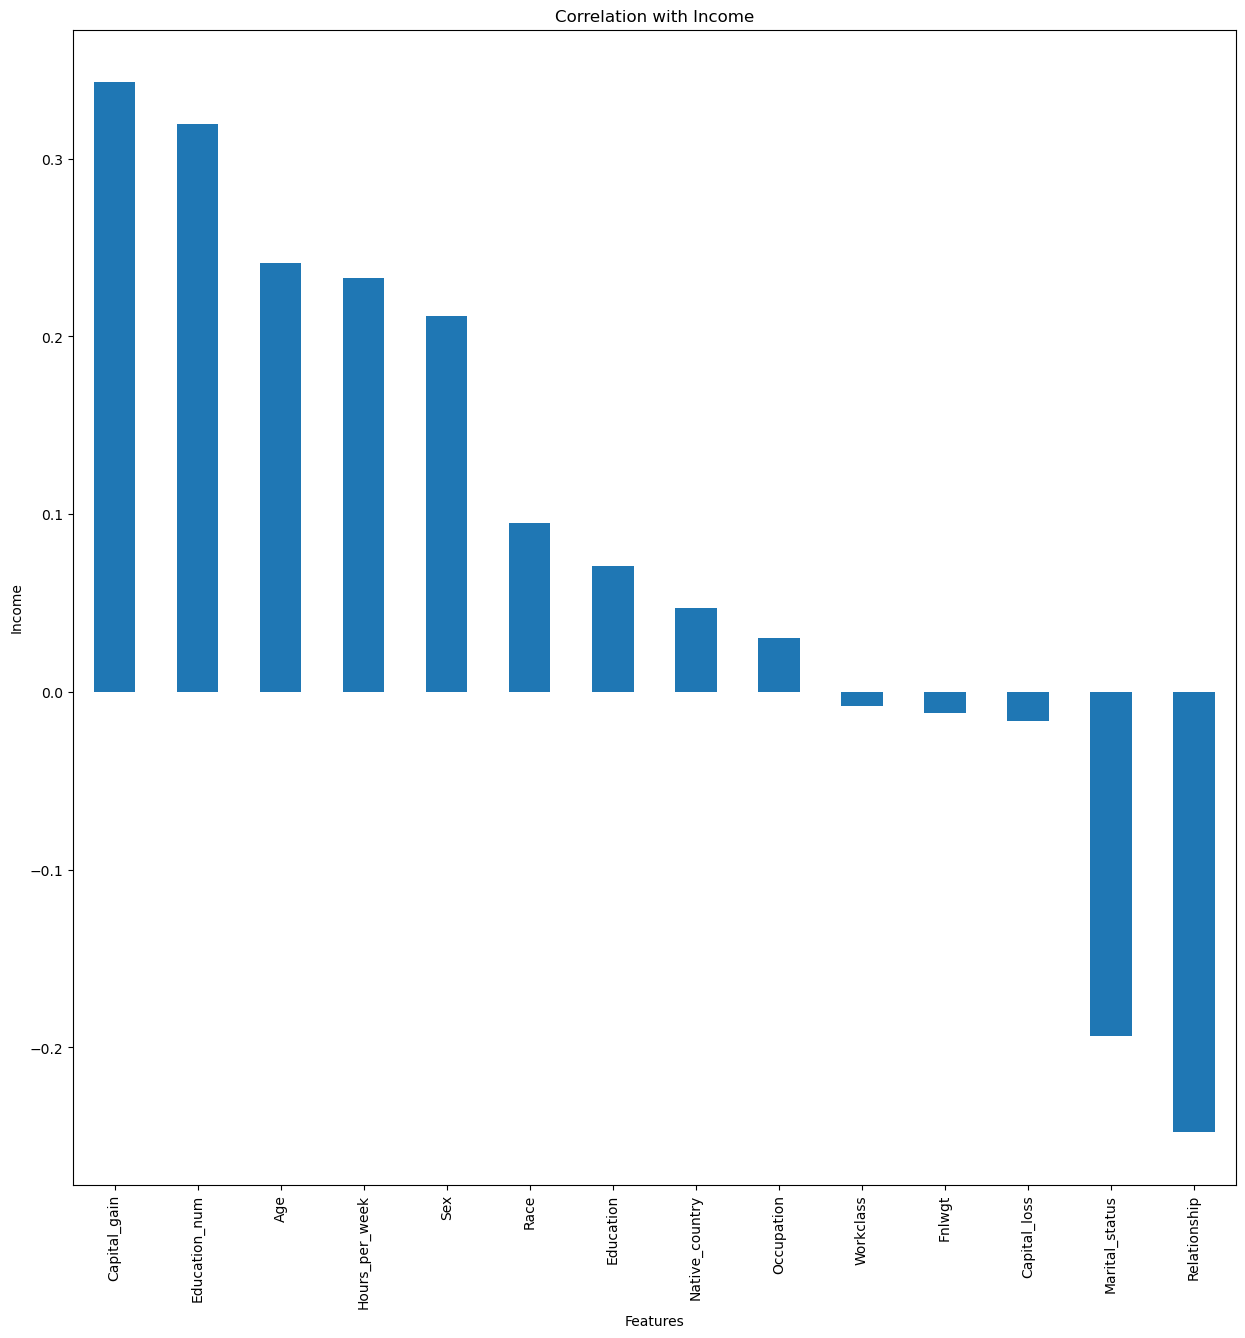

In [149]:
plt.figure(figsize=(15,15))
df.corr()['Income'].drop('Income').sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Income')
plt.title('Correlation with Income')
plt.show()

In [150]:
# Capital gain is highly correlated with income
# Capital_loss, Workclass, Occupation, Native_country and race are poorly coorelated features
# After checking it's Multicollinearity we will decide to drop them or go for PCA
# Between input features maximum correlation of -0.557 exist between sex and relationship

In [151]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif["features"] = df.columns
vif

,VIF Factor,features
0,10.451414,Age
1,8.809700,Workclass
2,4.725712,Fnlwgt
3,9.312008,Education
4,24.037077,Education_num
5,4.372837,Marital_status
6,3.377197,Occupation
7,2.945858,Relationship
8,37.134945,Race
9,4.588603,Sex


In [152]:
# Rmoving some Highly correlated features to reduce Multicollinearity but this will not work because 
# Most of our input features are moderately or poorly correlated to each other and we need to check it
# Another way to Address this issue is to use  Scaled Data then apply PCA 

In [153]:
# Balancing IMbalanced target feature

In [156]:
df['Income'].value_counts()

Income
0    21527
1     6224
Name: count, dtype: int64

In [157]:
from imblearn.over_sampling import SMOTE

In [158]:
# Splitting the data into target and dependent features

In [159]:
x = df.drop('Income',axis=1)
y = df['Income']

In [160]:
# Oversampling using SMOTE techniques

In [161]:
Oversample = SMOTE()
x,y = Oversample.fit_resample(x,y)

In [162]:
y.value_counts()

Income
0    21527
1    21527
Name: count, dtype: int64

In [163]:
# We have successfully balanced our class imbalanced data and all the the categories are equally represented ensuring that 
# our Model doesn't get biased to any category

In [164]:
# Standarad Scaling our data

In [166]:
from sklearn.preprocessing import StandardScaler

In [167]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

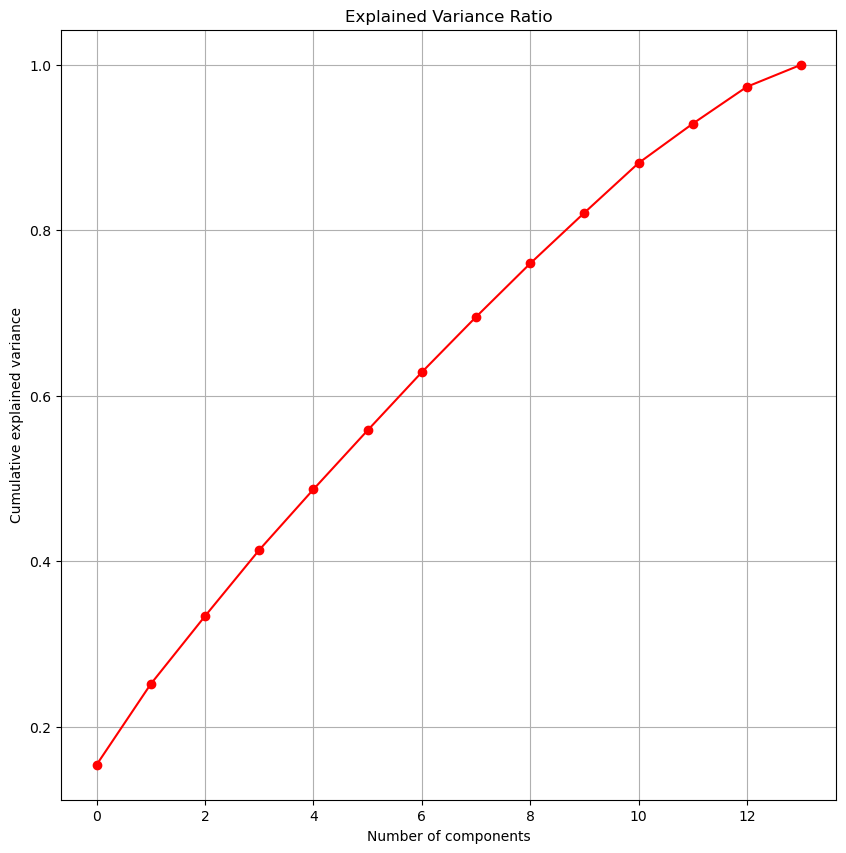

In [169]:
from sklearn.decomposition import PCA
pca = PCA()
# Plot the graph to find the principle components
x_pca = pca.fit_transform(x_scaled)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Explained Variance Ratio')
plt.grid()
plt.show()

In [170]:
# As per the graph we can see that we need to take 9 principle components as it explains 90% of the variance in the graph

In [171]:
# Applying PCA

In [173]:
pca_new = PCA(n_components=9)
x_new= pca_new.fit_transform(x_scaled)

In [174]:
principle_x = pd.DataFrame(x_new,columns = np.arange(9))

In [175]:
# Machine Learning Model Building 

In [176]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(principle_x,y,test_size=0.25,random_state=0)

In [177]:
x_train.shape

(32290, 9)

In [178]:
x_test.shape

(10764, 9)

In [179]:
y_train.shape

(32290,)

In [180]:
y_test.shape

(10764,)

In [182]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB

In [183]:
model = [LogisticRegression(),RandomForestClassifier(),SVC(),KNeighborsClassifier(),DecisionTreeClassifier(),ExtraTreesClassifier(),GaussianNB()]

In [184]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [185]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    y_pred = m.predict(x_test)
    print('Accuracy score of',m,'is')
    print(accuracy_score(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    print('\n')

Accuracy score of LogisticRegression() is
0.7675585284280937
[[4046 1356]
 [1146 4216]]
              precision    recall  f1-score   support

           0       0.78      0.75      0.76      5402
           1       0.76      0.79      0.77      5362

    accuracy                           0.77     10764
   macro avg       0.77      0.77      0.77     10764
weighted avg       0.77      0.77      0.77     10764



Accuracy score of RandomForestClassifier() is
0.8501486436269045
[[4471  931]
 [ 682 4680]]
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      5402
           1       0.83      0.87      0.85      5362

    accuracy                           0.85     10764
   macro avg       0.85      0.85      0.85     10764
weighted avg       0.85      0.85      0.85     10764



Accuracy score of SVC() is
0.8231140839836492
[[4115 1287]
 [ 617 4745]]
              precision    recall  f1-score   support

           0       0.87      0.76 

In [186]:
# Cross Validation

In [188]:
from sklearn.model_selection import cross_val_score

In [189]:
for m in model:
    score = cross_val_score(m,principle_x,y,cv=5)
    print("Cross Validation score:",m)
    print("Score:",score)
    print("Mean_score:",score.mean())
    print("Standard Deviation:",score.std())
    print('\n')
    print('=========================================================================')

Cross Validation score: LogisticRegression()
Score: [0.75775171 0.77168738 0.76680989 0.77261642 0.7775842 ]
Mean_score: 0.7692899218256745
Standard Deviation: 0.006706553659697688


Cross Validation score: RandomForestClassifier()
Score: [0.76332598 0.83672047 0.87179189 0.86598537 0.87665505]
Mean_score: 0.842895753223836
Standard Deviation: 0.042136185541355696


Cross Validation score: SVC()
Score: [0.77795843 0.81964929 0.83555917 0.8288236  0.84367015]
Mean_score: 0.8211321256567411
Standard Deviation: 0.022984464809284774


Cross Validation score: KNeighborsClassifier()
Score: [0.77424225 0.83068169 0.85274649 0.8562304  0.86689895]
Mean_score: 0.8361599558461202
Standard Deviation: 0.033125929009117955


Cross Validation score: DecisionTreeClassifier()
Score: [0.71849959 0.76924864 0.80234584 0.79549414 0.80406504]
Mean_score: 0.7779306483576971
Standard Deviation: 0.032233558863054


Cross Validation score: ExtraTreesClassifier()
Score: [0.77505516 0.84415283 0.87364998 0.8687

In [191]:
# Hyper Parameter Tuning : GridSearchCV

In [190]:
from sklearn.model_selection import GridSearchCV

In [192]:
parameter = {'criterion':['gini','entropy'],
             'max_depth':(20,30,40),
             'min_samples_split':(3,5,8),
             'n_estimators':(100,150,200)}


In [193]:
GCV = GridSearchCV(ExtraTreesClassifier(),parameter,verbose=10)
GCV.fit(x_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 1/5; 1/54] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100;, score=0.832 total time=   2.7s
[CV 2/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 2/5; 1/54] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100;, score=0.840 total time=   2.6s
[CV 3/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 3/5; 1/54] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100;, score=0.839 total time=   2.6s
[CV 4/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 4/5; 1/54] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100;, score=0.839 total time=   2.6s
[CV 5/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 5/5; 1/54

GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': (20, 30, 40),
                         'min_samples_split': (3, 5, 8),
                         'n_estimators': (100, 150, 200)},
             verbose=10)

In [194]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 30,
 'min_samples_split': 3,
 'n_estimators': 200}

In [195]:
# Best parameters for tuning the model and getting the best accuracy

In [201]:
# Training the model with best parameters

In [196]:
final_model  =ExtraTreesClassifier(criterion='gini',max_depth=30,min_samples_split=3,n_estimators=200)

In [197]:
final_model.fit(x_train,y_train)

ExtraTreesClassifier(max_depth=30, min_samples_split=3, n_estimators=200)

In [198]:
y_pred = final_model.predict(x_test)

In [202]:
print("Accuracy Score:",accuracy_score(y_test,y_pred))

Accuracy Score: 0.8541434410999629


In [203]:
print("Confusion Matrix: ",confusion_matrix(y_test,y_pred))
print("Classification Report: ",classification_report(y_test,y_pred))

Confusion Matrix:  [[4440  962]
 [ 608 4754]]
Classification Report:                precision    recall  f1-score   support

           0       0.88      0.82      0.85      5402
           1       0.83      0.89      0.86      5362

    accuracy                           0.85     10764
   macro avg       0.86      0.85      0.85     10764
weighted avg       0.86      0.85      0.85     10764



In [204]:
# Plotting ROC curve

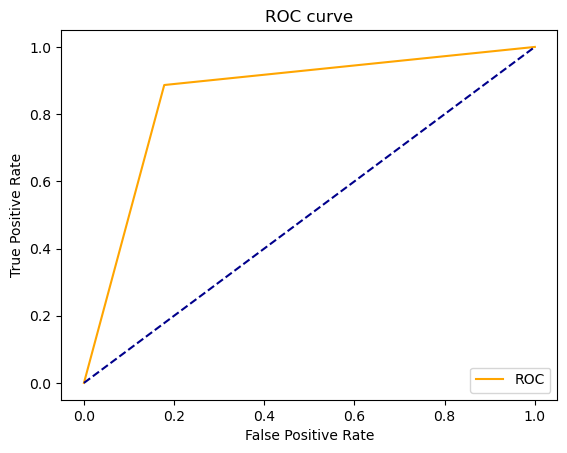

In [208]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.legend(prop={'size':10},loc='lower right')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [209]:
# AUC Score
auc_score = roc_auc_score(y_test, y_pred)
auc_score

0.8542636411480075

In [210]:
# Saving the model 

In [211]:
# Saving the model
import pickle
filename = 'Census_Income.pkl'
pickle.dump(final_model, open(filename, 'wb'))